# Problem Statement

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign


# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

cancer = load_breast_cancer()

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
with open('data-description.txt', "w") as file:
   file.write(cancer["DESCR"])

In [4]:
df_cancer = pd.DataFrame(
    np.c_[cancer["data"], cancer["target"]],
    columns = np.append(cancer["feature_names"], "target"))

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Visualisation

c:\Users\hanzh\miniconda3\envs\main\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

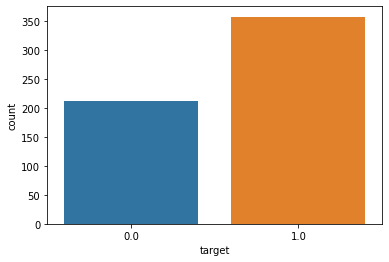

In [5]:
sns.countplot(df_cancer["target"])

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

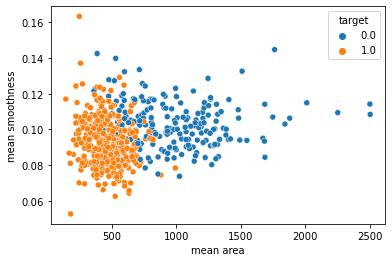

In [6]:
sns.scatterplot(data = df_cancer, x = "mean area", y = "mean smoothness", hue = "target")

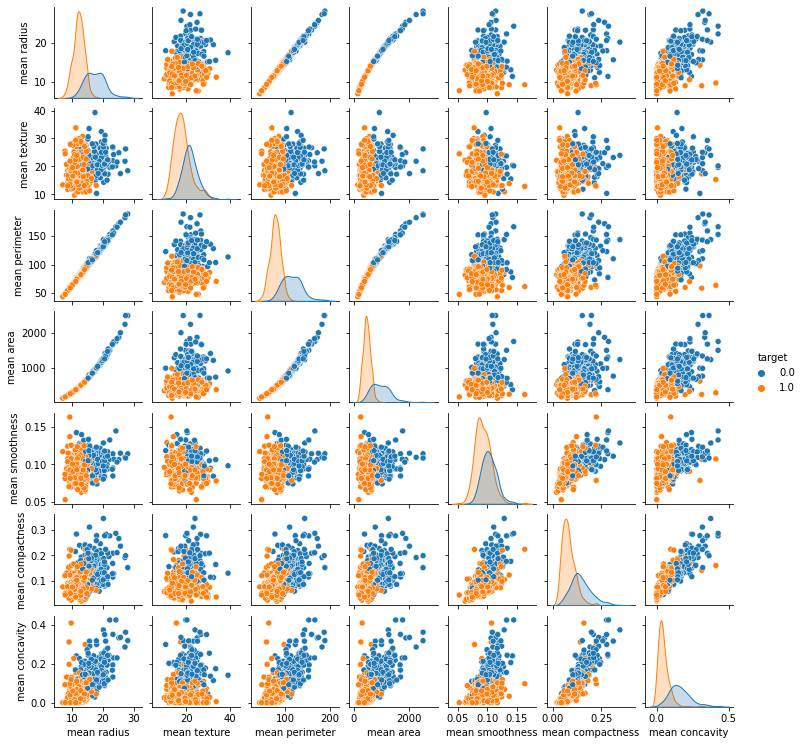

In [7]:
sns.pairplot(df_cancer, hue="target", vars = df_cancer.columns[:7], height = 1.5)

<AxesSubplot:>

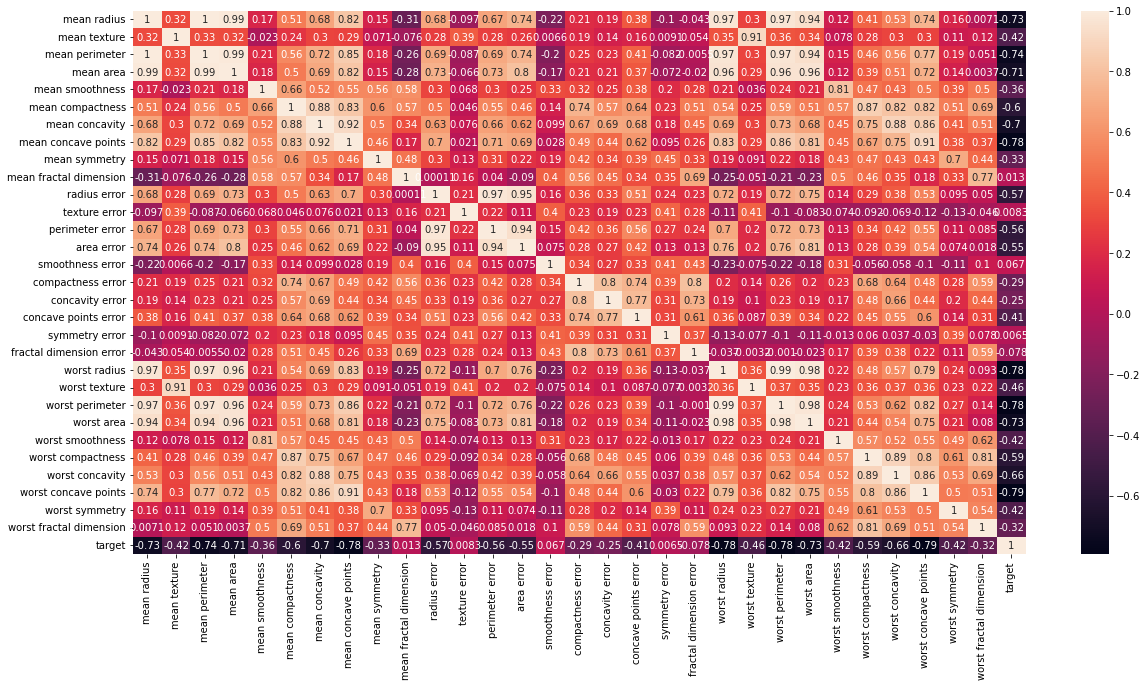

In [8]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_cancer.corr(), annot = True)

# Model Training

In [9]:
X = df_cancer.drop("target", axis = 1)
y = df_cancer["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

<AxesSubplot:>

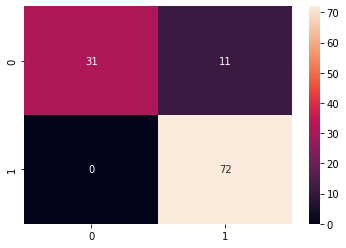

In [11]:
y_pred = svc_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Improvement: Normalisation

In [12]:
def normalise(x):
    return (x - x.min()) / (x.max() - x.min())

In [13]:
min_train = X_train.min()
range_train = (X_train-min_train).max()

X_train_scaled = normalise(X_train)

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

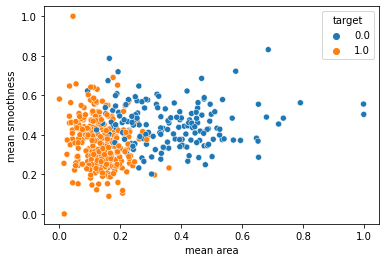

In [14]:
sns.scatterplot(data = X_train_scaled, x = "mean area", y = "mean smoothness", hue = y_train)

In [15]:
X_test_scaled = normalise(X_test)
svc_model.fit(X_train_scaled, y_train)

SVC()

<AxesSubplot:>

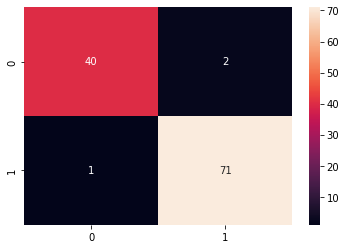

In [16]:
y_pred = svc_model.predict(X_test_scaled)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        42
         1.0       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Improvement: Hyperparameter Tuning

In [39]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=4)

In [40]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             verbose=4)

In [34]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

<AxesSubplot:>

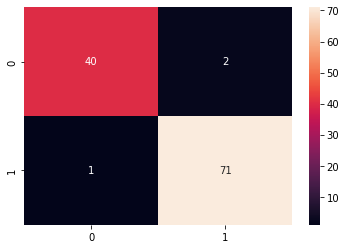

In [30]:
y_pred = grid.predict(X_test_scaled)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        42
         1.0       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

